####################For CW2 Q2###############################


In [12]:
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import tensorflow.keras as keras
from matplotlib import pyplot as plt
import numpy as np
import gzip
%matplotlib inline
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [13]:
# import tensorflow as tf
# class Denoising(tf.keras.callbacks.Callback):
#     def __init__(self, batch_size):
#         super().__init__()
# #         self.data = data
#         self.batch_size = batch_size
#         self.previous_loss = None
#     def on_train_batch_begin(self, batch, logs=None):
#         print('batch:', batch)
#         print('self.model.layers', self.model.layers[0].input)


# check_callback = Denoising(128)

In [14]:
#load fashion_mnist dataset from keras 
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

In [15]:
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


Text(0.5, 1.0, 'Ground Truth : 9')

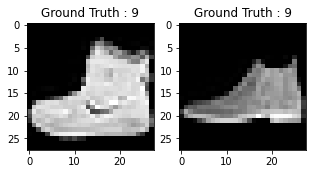

In [16]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

In [19]:
# Convert data type from int8 to float32
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

# Normalize the data: rescale the pixel values in range 0 - 1 inclusive for training purposes
train_X = train_X / 255.
test_X = test_X / 255.


In [20]:
from sklearn.model_selection import train_test_split
x_train_noise,x_valid_noise,train_ground,valid_ground = train_test_split(train_X_noise,
                                                             train_X, 
                                                             test_size=0.2, 
                                                             random_state=13)

In [21]:
# train_X = train_X.reshape(-1, 28,28, 1)
# valid_X = valid_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)

x_train_noise = x_train_noise.reshape(-1, 28,28, 1)
x_valid_noise = x_valid_noise.reshape(-1, 28,28, 1)

train_ground = train_ground.reshape(-1, 28,28, 1)
valid_ground = valid_ground.reshape(-1, 28,28, 1)


test_X_noise = test_X_noise.reshape(-1, 28,28, 1)

Train Images


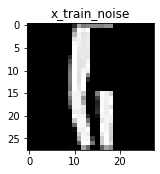

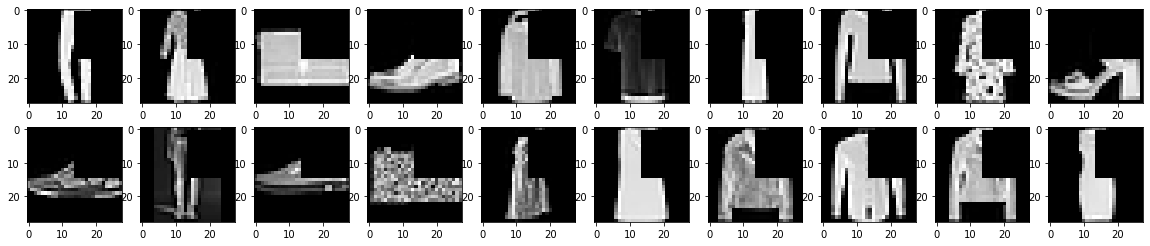

Valid Images


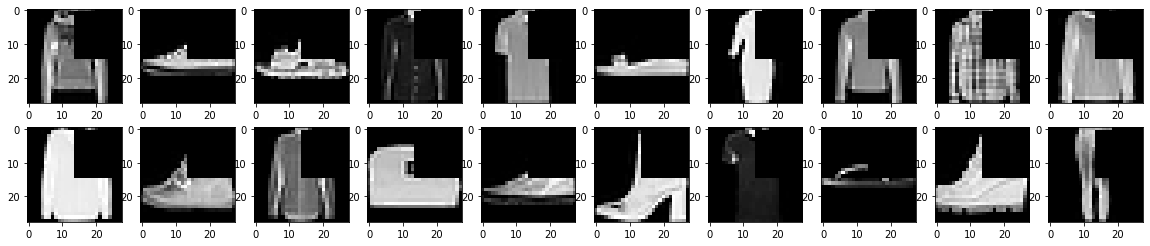

Text(0.5, 1.0, 'test_X_noise')

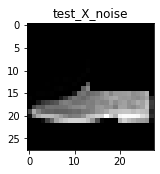

In [22]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(x_train_noise[0,:,:], cmap='gray')
plt.title("x_train_noise")


plt.figure(figsize=(20, 4))
print("Train Images")
for i in range(20):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_train_noise[i, ..., 0], cmap='gray')
plt.show()   


plt.figure(figsize=(20, 4))
print("Valid Images")
for i in range(20):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_valid_noise[i, ..., 0], cmap='gray')
plt.show() 

plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(test_X_noise[0,:,:], cmap='gray')
plt.title("test_X_noise")

In [13]:
batch_size = 128
epochs = 50
input_img = Input(shape = (28, 28, 1))


In [14]:
# Callback Functions
early_stopping_monitor = EarlyStopping(monitor = 'val_loss', patience=5, verbose=1)

In [15]:
def autoencoder(input_img):
    #encoder
#     input = 28 x 28 x 1 (wide and thin)
#     conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #28 x 28 x 32
#     pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #14 x 14 x 32
#     conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) #14 x 14 x 64
#     pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #7 x 7 x 64
#     conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) #7 x 7 x 128 (small and thick)

#     #decoder
#     conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3) #7 x 7 x 128
#     up1 = UpSampling2D((2,2))(conv4) # 14 x 14 x 128
#     conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1) # 14 x 14 x 64
#     up2 = UpSampling2D((2,2))(conv5) # 28 x 28 x 64
#     decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2) # 28 x 28 x 1
#     return decoded


#     conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #28 x 28 x 32
#     pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #14 x 14 x 32
#     conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) #14 x 14 x 64
#     pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #7 x 7 x 64
#     conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) #7 x 7 x 128 (small and thick)
#     encoded = MaxPooling2D((2, 2), padding='same')(conv3) # 3.5 x 3.5 x 128

#     #decoder
#     conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded) #3.5 x 3.5 x 128
#     up1 = UpSampling2D((2,2))(conv4) # 7 x 7 x 128
#     conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1) # 7 x 7 x 64
#     up2 = UpSampling2D((2,2))(conv5) # 14 x 14 x 64
#     conv6 = Conv2D(32, (3, 3), activation='relu', padding='same')(up2) # 14 x 14 x 32
#     up3 = UpSampling2D((2, 2))(conv6)
#     decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up3) # 28 x 28 x 1
#     return decoded

    x = Conv2D(128, (3, 3), activation='relu', padding='same')(input_img) # 28 x 28 x 16
    x = MaxPooling2D((2, 2), padding='same')(x) # 14 x 14 x 16
    x = Dropout(0.2)(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)# 14 x 14 x 8
    x = Dropout(0.2)(x)
    x = MaxPooling2D((2, 2), padding='same')(x)# 7 x 7 x 8
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x) # 7 x 7 x 8
    encoded = MaxPooling2D((2, 2), padding='same')(x) # 3.5x 3.5 x 8


    x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded) # 3.5x 3.5 x 8
    x = UpSampling2D((2, 2))(x) # 7 x 7 x 8
    x = Dropout(0.2)(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x) # 7 x 7 x 8
    x = UpSampling2D((2, 2))(x) # 14 x 14 x 8
    x = Dropout(0.2)(x)
    x = Conv2D(128, (3, 3), activation='relu')(x) # 14 x 14 x 16
    x = UpSampling2D((2, 2))(x) # 28 x 28 x 8
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x) # 28 x 28 x 1
    return decoded
#     autoencoder = keras.Model(input_img, decoded)
#     autoencoder.compile(optimizer='adam', loss='binary_crossentropy')




# def create_cnn_model(pool_type='max', conv_activation='sigmoid', dropout_rate=0.10):
#     # create model
#     model = Sequential()
    
#     #encoder
#     model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1))) 
#     model.add(MaxPooling2D(pool_size=(2, 2)))   
#     model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',padding='same',)) 
    
#     #decoder
#     model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',padding='same')) # 64
#     model.add(UpSampling2D((2,2))) # 64
#     model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
#     model.add(UpSampling2D((2,2)))
#     model.add(Conv2D(32, kernel_size=(3, 3), activation='sigmoid', padding='same'))
#     # add a dropout layer if rate is not null    
#     model.add(Dense(10, activation='sigmoid'))
    
#     # Compile model
#     model.compile( 
#         optimizer=RMSprop(),
#         loss='mean_squared_error',
#         )    
#     return model
# cnn = create_cnn_model()
# cnn.compile(
#     optimizer=RMSprop(),
#     loss='mean_squared_error',
# )
# cnn.summary()
# history = cnn.fit(
#     x_train_noise,
#     train_ground,
#     epochs=20,  
#     validation_data=(x_valid_noise, valid_ground), 
#     batch_size=128,
# )

In [16]:
autoencoder = Model(input_img, autoencoder(input_img))
autoencoder.compile(loss='mean_squared_error', optimizer = Adam(), metrics=['accuracy'])


In [29]:
#denoising
# autoencoder_train = autoencoder.fit(x_train_noise, train_ground, batch_size=batch_size,epochs=epochs,verbose=1, shuffle=True, validation_data=(x_valid_noise, valid_ground))
autoencoder_train = autoencoder.fit(x_train_noise, train_ground, batch_size=batch_size,epochs=epochs,verbose=1, shuffle=True, callbacks=[early_stopping_monitor], validation_data=(x_valid_noise, valid_ground))

# autoencoder_train = autoencoder.fit(train_X, train_ground, batch_size=batch_size,epochs=epochs,verbose=1, shuffle=True, validation_data=(valid_X, valid_ground))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
batch: 0
self.model.layers Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)
  128/48000 [..............................] - ETA: 5s - loss: 0.0177 - accuracy: 0.5079batch: 1
self.model.layers Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)
batch: 2
self.model.layers Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)
batch: 3
self.model.layers Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)
batch: 4
self.model.layers Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)
batch: 5
self.model.layers Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)
  768/48000 [..............................] - ETA: 4s - loss: 0.0197 - accuracy: 0.5025batch: 6
self.model.layers Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)
batch: 7
self.model.layers Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)
batch: 8
self.model.layers Tensor("input_1:0", shape=(None, 28, 28,

 9984/48000 [=====>........................] - ETA: 3s - loss: 0.0194 - accuracy: 0.5036batch: 78
self.model.layers Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)
batch: 79
self.model.layers Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)
batch: 80
self.model.layers Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)
batch: 81
self.model.layers Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)
batch: 82
self.model.layers Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)
10624/48000 [=====>........................] - ETA: 3s - loss: 0.0193 - accuracy: 0.5047batch: 83
self.model.layers Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)
batch: 84
self.model.layers Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)
batch: 85
self.model.layers Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)
batch: 86
self.model.layers Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)
batch: 87
self.model.layers Tens

19840/48000 [===========>..................] - ETA: 2s - loss: 0.0190 - accuracy: 0.5050batch: 155
self.model.layers Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)
batch: 156
self.model.layers Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)
batch: 157
self.model.layers Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)
batch: 158
self.model.layers Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)
batch: 159
self.model.layers Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)
20480/48000 [===========>..................] - ETA: 2s - loss: 0.0189 - accuracy: 0.5052batch: 160
self.model.layers Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)
batch: 161
self.model.layers Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)
batch: 162
self.model.layers Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)
batch: 163
self.model.layers Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)
batch: 164
self.model.l

batch: 232
self.model.layers Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)
batch: 233
self.model.layers Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)
batch: 234
self.model.layers Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)
30080/48000 [=================>............] - ETA: 1s - loss: 0.0186 - accuracy: 0.5054batch: 235
self.model.layers Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)
batch: 236
self.model.layers Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)
batch: 237
self.model.layers Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)
batch: 238
self.model.layers Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)
batch: 239
self.model.layers Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)
30720/48000 [==================>...........] - ETA: 1s - loss: 0.0185 - accuracy: 0.5054batch: 240
self.model.layers Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)
batch: 241
self.model.l

39680/48000 [=======================>......] - ETA: 0s - loss: 0.0182 - accuracy: 0.5056batch: 310
self.model.layers Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)
batch: 311
self.model.layers Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)
batch: 312
self.model.layers Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)
batch: 313
self.model.layers Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)
batch: 314
self.model.layers Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)
40320/48000 [========================>.....] - ETA: 0s - loss: 0.0182 - accuracy: 0.5055batch: 315
self.model.layers Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)
batch: 316
self.model.layers Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)
batch: 317
self.model.layers Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)
batch: 318
self.model.layers Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)
batch: 319
self.model.l

 1408/48000 [..............................] - ETA: 4s - loss: 0.0169 - accuracy: 0.5053batch: 11
self.model.layers Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)
batch: 12
self.model.layers Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)
batch: 13
self.model.layers Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)
batch: 14
self.model.layers Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)
batch: 15
self.model.layers Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)
 2048/48000 [>.............................] - ETA: 4s - loss: 0.0166 - accuracy: 0.5097batch: 16
self.model.layers Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)
batch: 17
self.model.layers Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)
batch: 18
self.model.layers Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)
batch: 19
self.model.layers Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)
batch: 20
self.model.layers Tens

KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (46,) and (28,)

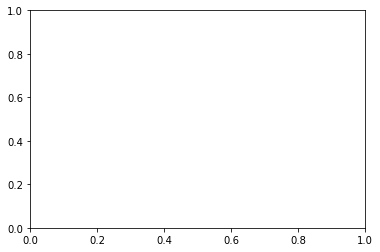

In [122]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(46)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
pred = autoencoder.predict(test_X_noise)
print(pred.shape)
print(valid_ground.shape)
print(train_ground.shape)

Test Images


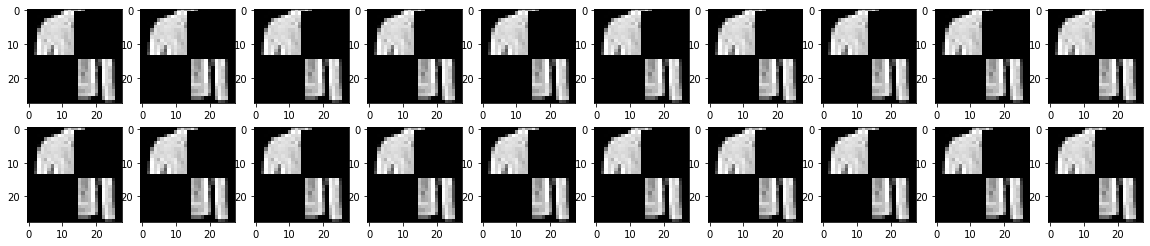

Valid Images


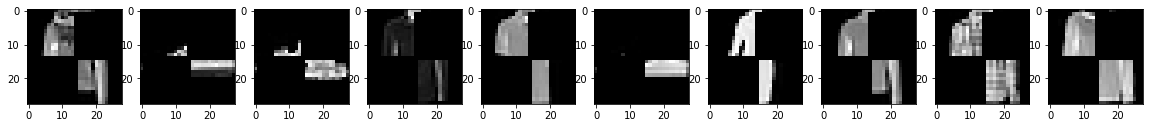

Reconstruction of Test Images


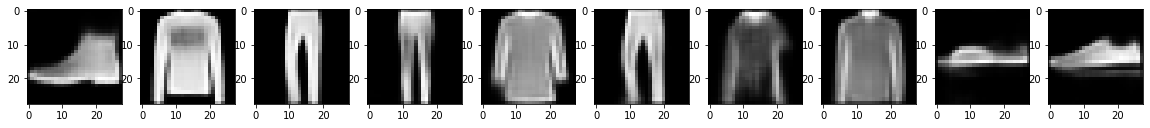

In [93]:
plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(20):
    plt.subplot(2, 10, i+1)
    plt.imshow(test_X_noise[i, ..., 0], cmap='gray')
plt.show()    
plt.figure(figsize=(20, 4))

print("Valid Images")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_valid_noise[i, ..., 0], cmap='gray')  
plt.show()

plt.figure(figsize=(20, 4))
print("Reconstruction of Test Images")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i, ..., 0], cmap='gray')  
plt.show()

Original Images


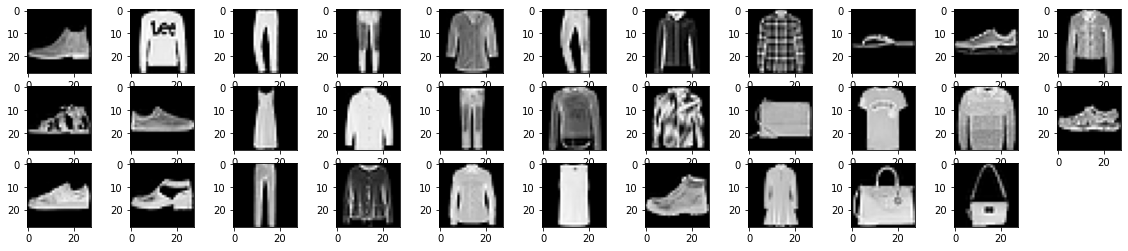

Noisy Images


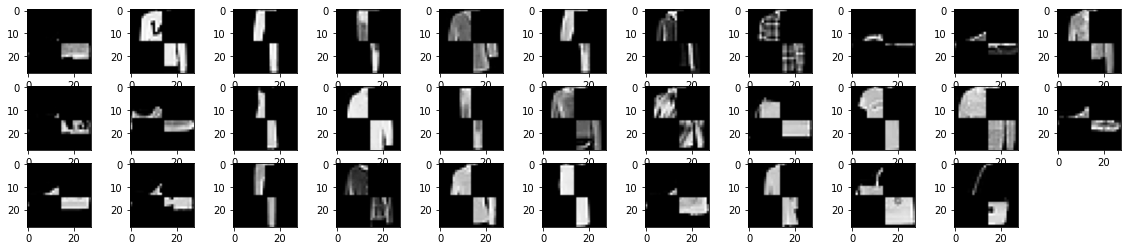

Denoised of Test Images


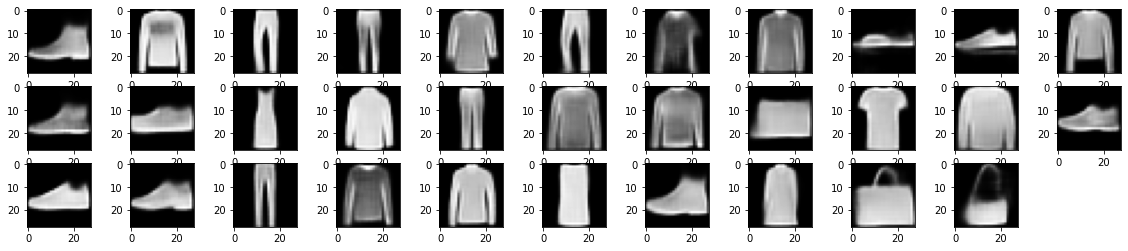

In [100]:
plt.figure(figsize=(20, 4))
print("Original Images")
for i in range(32):
    plt.subplot(3, 11, i+1)
    plt.imshow(test_X[i, ..., 0], cmap='gray')
plt.show()    
plt.figure(figsize=(20, 4))

print("Noisy Images")
for i in range(32):
    plt.subplot(3, 11, i+1)
    plt.imshow(test_X_noise[i, ..., 0], cmap='gray')  
plt.show()

plt.figure(figsize=(20, 4))
print("Denoised of Test Images")
for i in range(32):
    plt.subplot(3, 11, i+1)
    plt.imshow(pred[i, ..., 0], cmap='gray')  
plt.show()

In [88]:
test_X.

(10000, 28, 28)

In [ ]:
import tensorflow.keras.backend as K
print(K.eval(autoencoder.optimizer.lr))

# Hyperparameter Tuning

In [42]:


model = KerasClassifier(build_fn=Model(input_img, autoencoder(input_img)), batch_size=1000, epochs=10) 
# use verbose=0 if you do not want to see progress

########################################################
# Use scikit-learn to grid search 
activation =  ['relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'] # softmax, softplus, softsign 
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
weight_constraint=[1, 2, 3, 4, 5]
neurons = [1, 5, 10, 15, 20, 25, 30]
init = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
optimizer = [ 'SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
##############################################################
# grid search epochs, batch size
epochs = [1, 10] # add 50, 100, 150 etc
batch_size = [1000, 5000] # add 5, 10, 20, 40, 60, 80, 100 etc
param_grid = dict(epochs=epochs, batch_size=batch_size)
##############################################################
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(x_train_noise, train_ground) 
##############################################################
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
##############################################################

TypeError: can't pickle _thread.RLock objects

In [12]:
#define a function to create model, required for KerasClassifier
# the function takes drop_out rate as argument so we can optimize it  
def create_model(dropout_rate=0):
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(input_img) # 28 x 28 x 16
    x = MaxPooling2D((2, 2), padding='same')(x) # 14 x 14 x 16
    x = Dropout(dropout_rate)(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)# 14 x 14 x 8
    x = Dropout(dropout_rate)(x)
    x = MaxPooling2D((2, 2), padding='same')(x)# 7 x 7 x 8
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x) # 7 x 7 x 8
    encoded = MaxPooling2D((2, 2), padding='same')(x) # 3.5x 3.5 x 8


    x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded) # 3.5x 3.5 x 8
    x = UpSampling2D((2, 2))(x) # 7 x 7 x 8
    x = Dropout(dropout_rate)(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x) # 7 x 7 x 8
    x = UpSampling2D((2, 2))(x) # 14 x 14 x 8
    x = Dropout(dropout_rate)(x)
    x = Conv2D(128, (3, 3), activation='relu')(x) # 14 x 14 x 16
    x = UpSampling2D((2, 2))(x) # 28 x 28 x 8
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x) # 28 x 28 x 1
    
    decoded.compile(loss='mean_squared_error', optimizer = RMSprop())
    return decoded
model = KerasClassifier(build_fn=create_model, verbose=1)
param_grid = {'epochs':[10,20,30,40,50],
              'batch_size':[32,64,128,256,512,1024],
             'dropout_rate': [0.0, 0.10, 0.20, 0.30],}


def display_cv_results(search_results):
    print('Best score = {:.4f} using {}'.format(search_results.best_score_, search_results.best_params_))
    means = search_results.cv_results_['mean_test_score']
    stds = search_results.cv_results_['std_test_score']
    params = search_results.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print('mean test accuracy +/- std = {:.4f} +/- {:.4f} with: {}'.format(mean, stdev, param))    

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

grid_result = grid.fit(x_train_noise, train_ground)  # fit the full dataset as we are using cross validation 


# print out results
print('time for grid search = {:.0f} sec'.format(time()-start))
display_cv_results(grid_result)

ValueError: Invalid shape for y: (48000, 28, 28, 1)

'jt'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
